In [3]:
import sys
import heapq
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze
INF = float('inf')

## Bellman-Ford

In [2]:
def bellman_ford(maze, source, destination):
    x, y = source 
    distance = []
    parent = []
    
    for _ in range(maze.num_rows):
        distance.append([INF for i in range(maze.num_columns)])
        parent.append(list(bytearray(maze.num_columns)))
    
    distance[x][y] = 0
    
    for _ in range(4*maze.num_rows*maze.num_columns):
        for x in range(maze.num_rows):
            for y in range(maze.num_columns):
                if(x > 0):
                    if(maze.grid[x][y].neighbors["N"] != INF):
                        if(distance[x-1][y] > distance[x][y]+maze.grid[x][y].neighbors["N"]):
                            distance[x-1][y] = distance[x][y]+maze.grid[x][y].neighbors["N"]
                            parent[x-1][y] = (x,y)
                if(x < maze.num_rows-1):
                    if(maze.grid[x][y].neighbors["S"] != INF):
                        if(distance[x+1][y] > distance[x][y]+maze.grid[x][y].neighbors["S"]):
                            distance[x+1][y] = distance[x][y]+maze.grid[x][y].neighbors["S"]
                            parent[x+1][y] = (x,y)
                if(y < maze.num_columns-1):
                    if(maze.grid[x][y].neighbors["E"] != INF):
                        if(distance[x][y+1] > distance[x][y]+maze.grid[x][y].neighbors["E"]):
                            distance[x][y+1] = distance[x][y]+maze.grid[x][y].neighbors["E"]
                            parent[x][y+1] = (x,y)
                if(y > 0):
                    if(maze.grid[x][y].neighbors["W"] != INF):
                        if(distance[x][y-1] > distance[x][y]+maze.grid[x][y].neighbors["W"]):
                            distance[x][y-1] = distance[x][y]+maze.grid[x][y].neighbors["W"]
                            parent[x][y-1] = (x,y)
        
    for x in range(maze.num_rows):
        for y in range(maze.num_columns):
            if(x > 0):
                if(maze.grid[x][y].neighbors["N"] != INF):
                    if(distance[x-1][y] > distance[x][y]+maze.grid[x][y].neighbors["N"]):
                        return 0
            if(x < maze.num_rows-1):
                if(maze.grid[x][y].neighbors["S"] != INF):
                    if(distance[x+1][y] > distance[x][y]+maze.grid[x][y].neighbors["S"]):
                        return 1
            if(y < maze.num_columns-1):
                if(maze.grid[x][y].neighbors["E"] != INF):
                    if(distance[x][y+1] > distance[x][y]+maze.grid[x][y].neighbors["E"]):
                        return 2
            if(y > 0):
                if(maze.grid[x][y].neighbors["W"] != INF):
                    if(distance[x][y-1] > distance[x][y]+maze.grid[x][y].neighbors["W"]):
                        return 3
    
    for x in range(maze.num_rows):
        for y in (0, maze.num_columns-1):
            if((x,y) == destination):
                out = [(x,y)]
                while(parent[x][y] != 0):
                    x, y = parent[x][y]
                    out.append((x,y))
                return out[::-1]
    
    return []

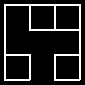

In [10]:
maze = Maze(3,3)
maze.add_path((0,0), "S", 0)
maze.add_path((0,1), "E", 0)
maze.add_path((1,1), "S", 0)
maze.add_path((1,1), "E", 0)
maze.add_path((1,2), "S", 0)
display(maze.draw(cell_width = 25))

In [11]:
bellman_ford(maze, (0,0), (1,2))

[(0, 0), (1, 0), (1, 1), (1, 2)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


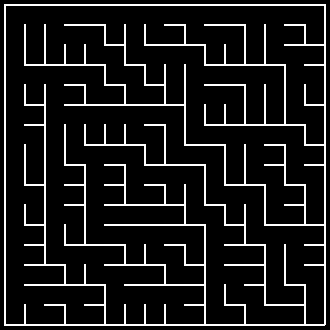

In [4]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")
bellman_ford((0, 0), maze)
# maze.add_colors()
display(maze.draw(cell_width=20))